In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data Acquisition:

In [3]:
df = pd.read_csv("NVDA.csv")

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894608,30091200
1,2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2,2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842055,18835200
3,2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
4,2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800251,7118400
5,2000-01-10,0.875000,0.937500,0.859375,0.901042,0.826528,23985600
6,2000-01-11,0.895833,0.906250,0.864583,0.864583,0.793084,14812800
7,2000-01-12,0.864583,0.865885,0.830729,0.842448,0.772779,12355200
8,2000-01-13,0.841146,0.885417,0.830729,0.877604,0.805028,13219200
9,2000-01-14,0.890625,0.951823,0.888021,0.915365,0.839666,60456000


In [5]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
6106,2024-04-11,874.200012,907.390015,869.260010,906.159973,906.159973,43163700
6107,2024-04-12,896.989990,901.750000,875.299988,881.859985,881.859985,42488900
6108,2024-04-15,890.979980,906.130005,859.289978,860.010010,860.010010,44307700
6109,2024-04-16,864.330017,881.179993,860.640015,874.150024,874.150024,37045300
6110,2024-04-17,883.400024,887.750000,839.500000,840.349976,840.349976,49540000
6111,2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000
6112,2024-04-19,831.500000,843.239990,756.059998,762.000000,762.000000,87190500
6113,2024-04-22,781.039978,800.729980,764.000000,795.179993,795.179993,59634100
6114,2024-04-23,807.690002,827.690002,802.640015,824.229980,824.229980,43855900
6115,2024-04-24,839.500000,840.820007,791.830017,796.770020,796.770020,50961600


# Data Preprocessing:

In [6]:
df['Close'].fillna(method='ffill', inplace=True)

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

The graph below seems to be stationary for the last 7 days. ARMA models are the most effective in predicting the temperature of the next 5-7 days.

<Axes: xlabel='Date', ylabel='Close'>

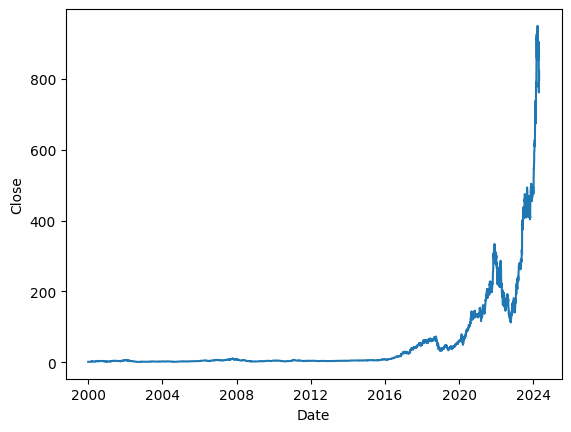

In [9]:
sns.lineplot(x='Date', y='Close', data=df)

In [10]:
close_prices = df['Close']

To test if the data is properly used for Augmented Dickey Fuller Test to understand if the data is stationary or non-stationary

H_0 (Null Hypothesis): alpha = 1, which means the data present is non-stationary

H_1 (Alternate Hypothesis): alpha != 1, which means the data present is be stationary meaning the data does not change over time.

In [11]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,6116,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6.116000e+03
mean,2012-02-28 11:27:16.363636480,53.052266,54.017201,52.031700,53.064741,52.794253,6.221933e+07
min,2000-01-03 00:00:00,0.608333,0.656667,0.600000,0.614167,0.563377,4.564400e+06
25%,2006-02-01 18:00:00,2.959688,3.027500,2.875000,2.950391,2.707880,3.615840e+07
50%,2012-02-28 12:00:00,4.683750,4.747500,4.608750,4.682500,4.389289,5.206235e+07
75%,2018-03-27 06:00:00,42.101873,42.645625,41.500000,42.102499,41.741090,7.465490e+07
max,2024-04-24 00:00:00,958.510010,974.000000,935.099976,950.020020,950.020020,9.230856e+08
std,NaN,121.267334,123.423982,118.835114,121.183234,121.214864,4.316714e+07


Stationary Data Check over longer duration

In [12]:
# df['mean']
# df['std_dev']

df['mean'] = df['Close'].rolling(window=365).mean()
df['std_dev'] = df['Close'].rolling(window=365).std()

<Axes: xlabel='Date', ylabel='mean'>

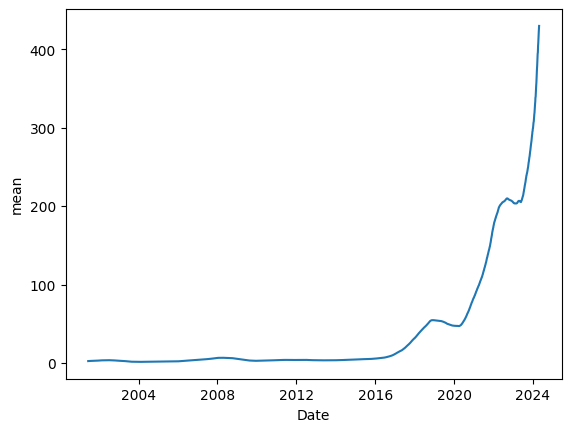

In [13]:
sns.lineplot(x='Date', y='mean', data=df)

<Axes: xlabel='Date', ylabel='std_dev'>

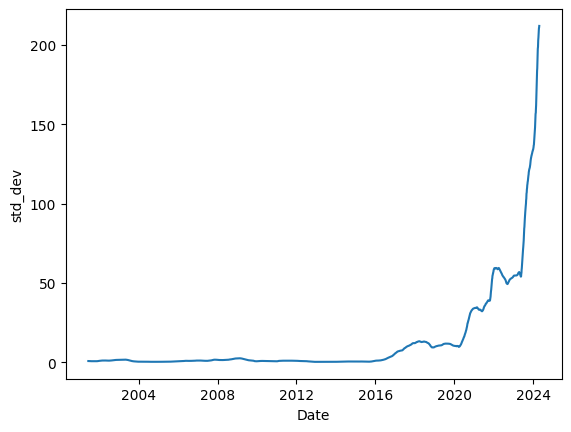

In [14]:
sns.lineplot(x='Date', y='std_dev', data=df)

Have to  data for smaller intervals

In [15]:
start_time = pd.to_datetime('2000-01-01')
end_time = pd.to_datetime('2023-12-31')

# Filter the DataFrame based on the time range
filtered_df = df[(df['Date'] >= start_time) & (df['Date'] <= end_time)]



<Axes: xlabel='Date', ylabel='Close'>

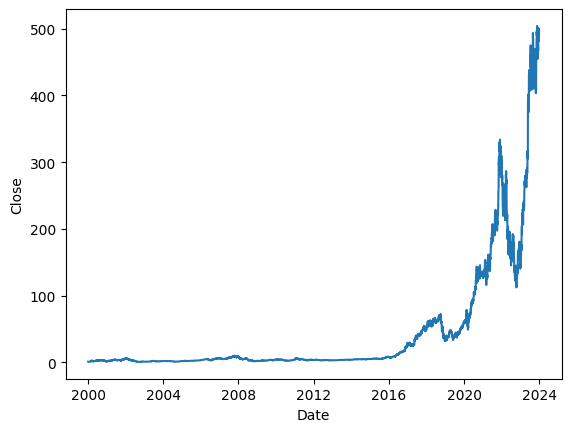

In [16]:
sns.lineplot(x='Date', y='Close', data=filtered_df)

In [17]:
df = filtered_df

In [128]:
filtered_df['mean'] = filtered_df['Close'].rolling(window=30).mean()
filtered_df['std_dev'] = filtered_df['Close'].rolling(window=30).std()

## The mean is stable for one year

<Axes: xlabel='Date', ylabel='mean'>

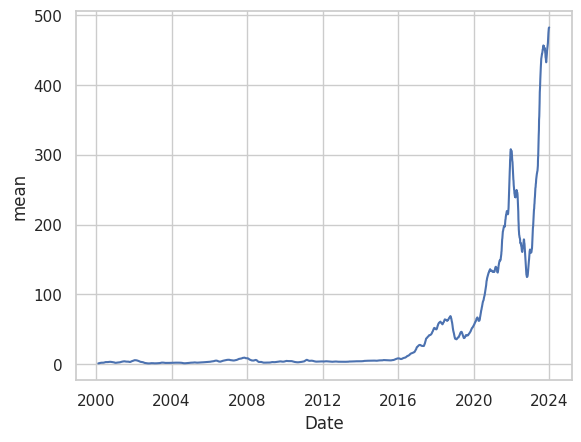

In [129]:
sns.lineplot(x='Date', y='mean', data=filtered_df)

In [130]:
close = df['Close'].to_list()

## Classical Decomposition for breaking down the trend, seasonl and residual pattern in the stock price

In [21]:
result_add = seasonal_decompose(close, model='additive', period=365)
result_mult = seasonal_decompose(close, model='multiplicative', period=365)

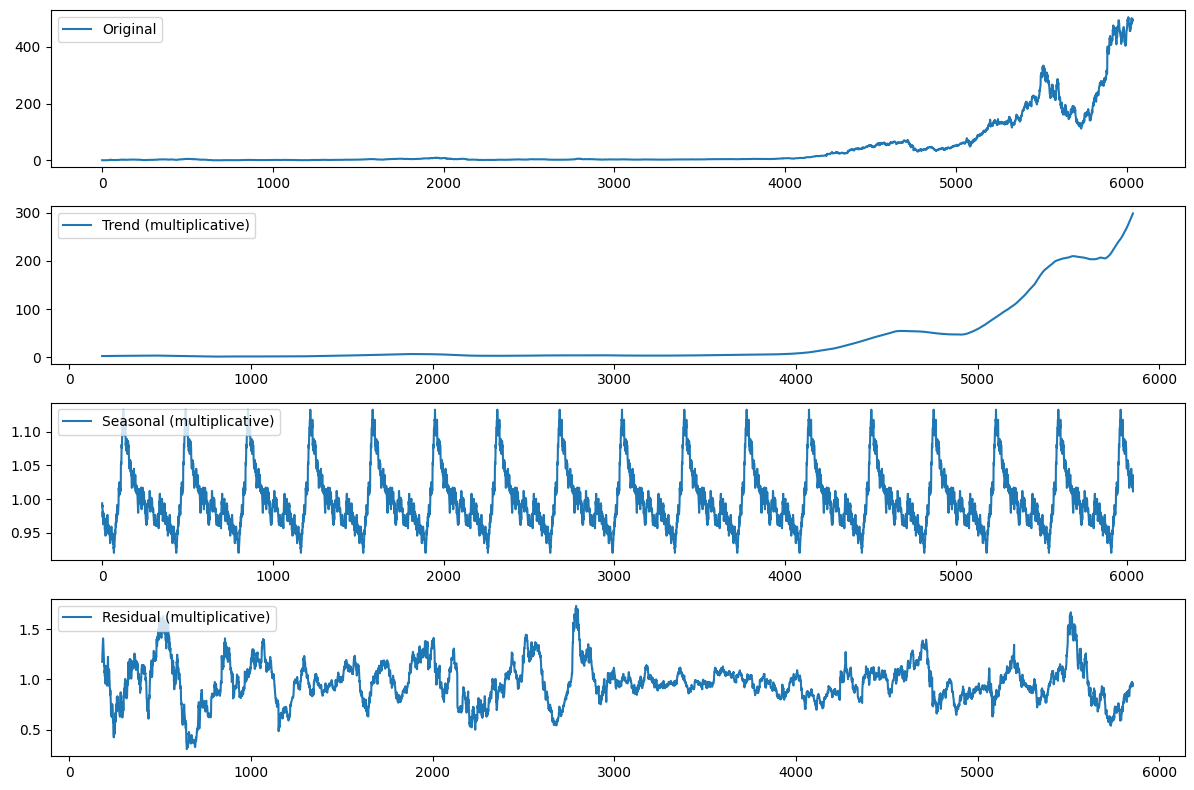

In [22]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(close, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result_mult.trend, label='Trend (multiplicative)')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result_mult.seasonal, label='Seasonal (multiplicative)')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result_mult.resid, label='Residual (multiplicative)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [23]:
# df.index = [i for i in range(df.shape[0])]

filtered_df['Close'].fillna(method='ffill', inplace=True)

close = filtered_df['Close']

# # Set the seasonal period (e.g., 365 for daily data with yearly seasonality)
# seasonal_period = 365

# # STL Decomposition with specified period
# stl = STL(df['Close'], seasonal=seasonal_period)
# result_stl = stl.fit()


# data.index = [i for i in range(data.shape[0])]
# result_stl.plot()
# plt.show()

## PLotting the distribution of the residual component

/tmp/ipykernel_5222/908736283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result_mult.resid, bins=30, kde=True, color='blue', hist_kws={'edgecolor': 'black'})  # Plot histogram with KDE curve


<Axes: ylabel='Density'>

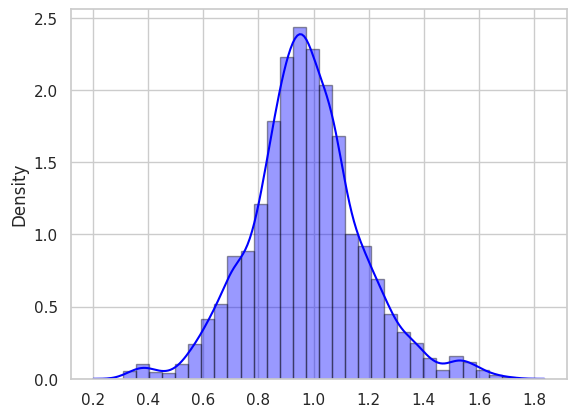

In [24]:
sns.set(style="whitegrid")  # Set style
sns.distplot(result_mult.resid, bins=30, kde=True, color='blue', hist_kws={'edgecolor': 'black'})  # Plot histogram with KDE curve

# Model Selection and Training:

In [27]:
trend_ = result_mult.trend
season_ = result_mult.seasonal
residual_ = result_mult.resid

# residual_

trend_notna = trend_[~np.isnan(trend_)]
season_notna = season_[~np.isnan(season_)]
residual_notna = season_[~np.isnan(residual_)]

## Predicting the trend component

In [32]:
trend_model = ExponentialSmoothing(trend_notna, trend='additive').fit()
trend_forecast = trend_model.forecast(steps=30)  # Forecast for the next 30 days

In [33]:
trend_forecast

array([299.30525556, 300.19703166, 301.08880777, 301.98058387,
       302.87235997, 303.76413608, 304.65591218, 305.54768829,
       306.43946439, 307.3312405 , 308.2230166 , 309.1147927 ,
       310.00656881, 310.89834491, 311.79012102, 312.68189712,
       313.57367323, 314.46544933, 315.35722543, 316.24900154,
       317.14077764, 318.03255375, 318.92432985, 319.81610596,
       320.70788206, 321.59965816, 322.49143427, 323.38321037,
       324.27498648, 325.16676258])

## Predicting the seasonal component

In [34]:
# For simplicity, repeating the last observed seasonal cycle
seasonal_forecast = season_notna[-365:]  # Since we set the seasonl component at 365 days = 1 year
seasonal_forecast = np.tile(seasonal_forecast, 1)[:30]

In [35]:
seasonal_forecast

array([1.02154174, 1.02101372, 1.01499512, 1.01816326, 1.00857194,
       1.00845826, 1.0152262 , 1.01947233, 1.01513922, 1.01292427,
       1.00414911, 0.99719122, 0.98862214, 0.98122852, 0.97960378,
       0.99014934, 0.99625697, 1.00982773, 1.0151369 , 1.01141163,
       1.00229935, 0.99569296, 1.00071646, 1.00888086, 1.01279872,
       1.01243419, 1.01410991, 0.99569088, 0.99242491, 1.00740509])

## ADF testing for trend data

In [38]:
result = adfuller(residual_notna, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
# print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'  {key}, {value}')

ADF Statistic: -8.700523220338908
p-value: 3.82032654342485e-14
Critial Values:
  1%, -3.431509772772519
Critial Values:
  5%, -2.862052506972954
Critial Values:
  10%, -2.5670428058786303


Given that the the p-value < 0.05, we need to reject to null-hypothesis. So, the data is in-fact stationary. Also, the ADF statistic less is compared to 1%, 5%, 10% significance levels.

H_0 hypothesis: The time series has a unit root
H_1 hypothesis: The time series is stationary

Now, we need to determine to determine the auto-correlation (ACF) and partial auto-correlation (PACF) to determine the lag value to be used in the ARMA model

The ADF statistics is less than all the critical values. So we have ground on rejecting the null hypothesis. Also, the p-value is almost close to 0 and definitely less than 0.05. So we can reject the null hypothesis if we take a differencing 1 for the ARIMA model

In [44]:
# temp = close_prices_diff.to_list()

temp = residual_notna

In [45]:
acf = sm.tsa.stattools.acf(temp, nlags=40)
pacf = sm.tsa.stattools.pacf(temp, nlags=40)

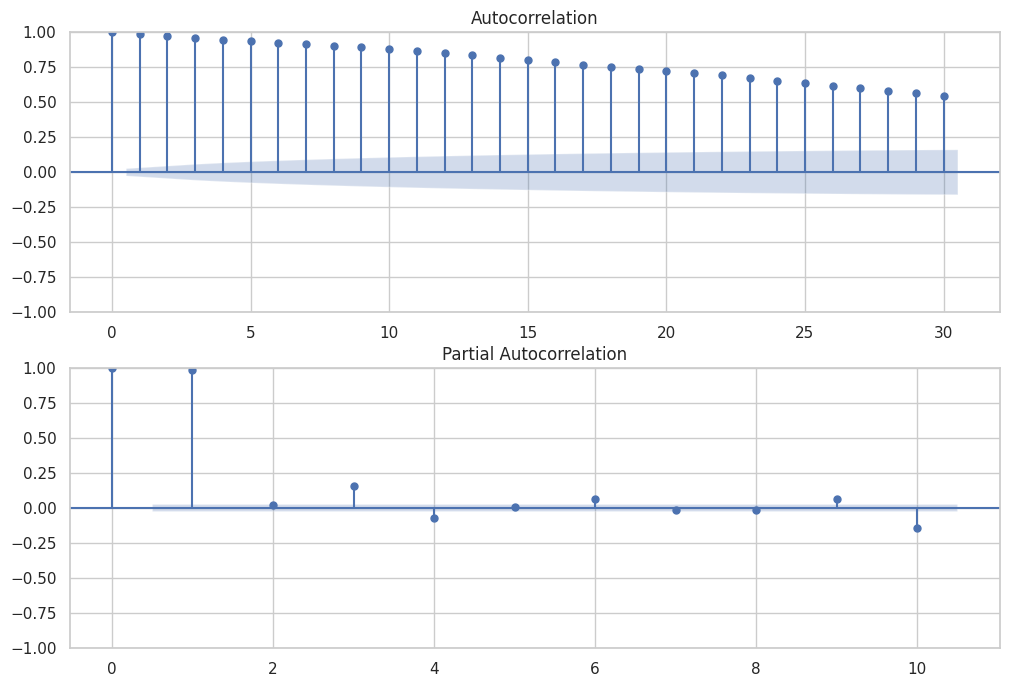

In [46]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp, lags=10, ax=ax2)

According to the Autocorrelation graph,  it suggests the presence of both seasonality and a decaying autocorrelation pattern as it suggests periodicity and gradual decrease

AR Component (p): The sine-like ACF pattern suggests the presence of seasonality. Since the ACF gradually decreases, it indicates a non-seasonal decay in autocorrelation. Considering the significant drop in the PACF at lag 3, it is best to add 3 as an AR term. However, since the ACF gradually decreases, there migh not be any need of additional AR terms. A lower value for the AR component, such as 1 or 2, can be used to evaluate the model's performance.

MA Component (q): Since the ACF gradually decreases, it suggests a non-seasonal decay in autocorrelation. If the PACF drops at lag 3 and there are no significant spikes in the ACF beyond lag 3, you might consider including lag 3 as an MA term. However, since the ACF gradually decreases, there is no need for many additional MA terms. Starting with a lower value for the MA component, such as 1 or 2, would be reasonable.

In [47]:
# Split the data into training, validation, and testing sets
train_size = int(len(temp) * 0.6)
val_size = int(len(temp) * 0.2)
test_size = len(temp) - train_size - val_size

train_data = temp[:train_size]
val_data = temp[train_size:train_size+val_size]
test_data = temp[train_size+val_size:]

In [48]:
len(train_data)

3403

In [49]:
len(val_data)

1134

In [50]:
len(test_data)

1136

In [51]:
import pmdarima as pm

# Using auto_arima to find the best model
model = pm.auto_arima(residual_notna, seasonal=False, trace=True,error_action='ignore', suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-38743.763, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16108.583, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-38736.750, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-38776.358, Time=0.93 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-38756.861, Time=0.86 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=1.29 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-38782.309, Time=0.79 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-38746.081, Time=0.97 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-38765.774, Time=0.50 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=-38793.683, Time=1.29 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-38748.206, Time=0.84 sec
 ARIMA(4,0,4)(0,0,0)[0]           

## Training and validation

## Model 1 p = 1 d =0 q = 1

In [52]:
arma_temp_mod1 = ARIMA(train_data, order=(1, 0, 1)).fit()

params = arma_temp_mod1.params
param_names = ['const', 'ar.L1', 'ma.L1', 'sigma2']

# Print parameters in readable format
for name, value in zip(param_names, params):
    print(f"{name}: {value:.6f}")

sigma_value = arma_temp_mod1.resid.std() ** 2
print(f"sigma2: {sigma_value:.6f}")

const: 1.000004
ar.L1: 0.983981
ma.L1: -0.024640
sigma2: 0.000064
sigma2: 0.000065


In [53]:
aic = arma_temp_mod1.aic
bic = arma_temp_mod1.bic
hqic = arma_temp_mod1.hqic

print(f"AIC: {aic:.6f}")
print(f"BIC: {bic:.6f}")
print(f"HQIC: {hqic:.6f}")

AIC: -23168.980498
BIC: -23144.450848
HQIC: -23160.213637


Akaike Information Criterion (AIC) , Bayesian Information Criterion (BIC) and Hannan-Quinn Information Criterion (HQIC) seems to show very good numbers as they are low. These show the model is not overly complex or overfitting. We will compare these numbers with other fits.

In [54]:
val_predictions = arma_temp_mod1.predict(start=len(train_data), end=len(train_data)+len(val_data)-1)

# Evaluate the model on the validation data
val_mse = mean_squared_error(val_data, val_predictions)

val_mas = mean_absolute_error(val_data, val_predictions)


print("Validation MSE: ", val_mse)
print("Validation MAE: ", val_mas)

Validation MSE:  0.001933005870089055
Validation MAE:  0.033892822707277136


## Model 2 p = 1 d = 0  q = 0

In [55]:
arma_temp_mod2 = ARIMA(train_data, order=(1, 0, 0)).fit()

# print(arma_temp_mod2.params)

params = arma_temp_mod2.params
param_names = ['const', 'ar.L1', 'ma.L1', 'sigma2']

# Print parameters in readable format
for name, value in zip(param_names, params):
    print(f"{name}: {value:.6f}")

sigma_value = arma_temp_mod1.resid.std() ** 2
print(f"sigma2: {sigma_value:.6f}")

const: 1.000004
ar.L1: 0.983152
ma.L1: 0.000064
sigma2: 0.000065


In [56]:
# print(arma_temp_mod2.aic, arma_temp_mod2.bic, arma_temp_mod2.hqic)

aic = arma_temp_mod2.aic
bic = arma_temp_mod2.bic
hqic = arma_temp_mod2.hqic

print(f"AIC: {aic:.6f}")
print(f"BIC: {bic:.6f}")
print(f"HQIC: {hqic:.6f}")


AIC: -23168.884655
BIC: -23150.487417
HQIC: -23162.309509


In [57]:
val_predictions = arma_temp_mod2.predict(start=len(train_data), end=len(train_data)+len(val_data)-1)

# Evaluate the model on the validation data
val_mse = mean_squared_error(val_data, val_predictions)

val_mas = mean_absolute_error(val_data, val_predictions)


print("Validation MSE: ", val_mse)
print("Validation MAE: ", val_mas)

Validation MSE:  0.0019337673610993987
Validation MAE:  0.03391046703307318


## Model 3 p = 2 and q = 1

In [62]:
arma_temp_mod3 = ARIMA(train_data, order=(5, 0, 5)).fit()

params = arma_temp_mod3.params
param_names = ['const', 'ar.L1', 'ma.L1', 'sigma2']

# Print parameters in readable format
for name, value in zip(param_names, params):
    print(f"{name}: {value:.6f}")

sigma_value = arma_temp_mod1.resid.std() ** 2
print(f"sigma2: {sigma_value:.6f}")

const: 0.996726
ar.L1: 0.609682
ma.L1: 0.377998
sigma2: 0.779641
sigma2: 0.000065


/mnt/e/virtual_env/weather/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:

aic = arma_temp_mod3.aic
bic = arma_temp_mod3.bic
hqic = arma_temp_mod3.hqic

print(f"AIC: {aic:.6f}")
print(f"BIC: {bic:.6f}")
print(f"HQIC: {hqic:.6f}")

AIC: -23348.908614
BIC: -23275.319662
HQIC: -23322.608030


In [64]:
# print(arma_temp_mod3.aic, arma_temp_mod3.bic, arma_temp_mod3.hqic)

In [65]:
val_predictions = arma_temp_mod3.predict(start=len(train_data), end=len(train_data)+len(val_data)-1)

# Evaluate the model on the validation data
val_mse = mean_squared_error(val_data, val_predictions)

val_mas = mean_absolute_error(val_data, val_predictions)


print("Validation MSE: ", val_mse)
print("Validation MAE: ", val_mas)

Validation MSE:  0.0019150569475051267
Validation MAE:  0.032942756343637025


As the requirement mentioned about a simple model, the BIC needs to be taken into consideration. The most optimal with fewer parameters would be the Model 4. This is the most optimal according to the analysis.

# Evaluation and Prediction:

In [127]:
sm.stats.durbin_watson(arma_temp_mod3.resid)

1.9593521111014947

In [126]:
arma_temp_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3403
Model:                 ARIMA(5, 0, 5)   Log Likelihood               11686.454
Date:                Wed, 15 May 2024   AIC                         -23348.909
Time:                        00:45:20   BIC                         -23275.320
Sample:                             0   HQIC                        -23322.608
                               - 3403                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9967      0.009    112.294      0.000       0.979       1.014
ar.L1          0.6097      0.144      4.227      0.000       0.327       0.892
ar.L2          0.3780      0.193      1.957      0.050      -0.001       0.757
ar.L3          0.7796      0.089      8.757      0.000       0.605       0.954
ar.L4         -0.2154      0.151     -1.430      0.153      -0.511       0.080
ar.L5         -0.5535      0.122     -4.538      0.000      -0.793      -0.314
ma.L1          0.3504      0.144      2.428      0.015       0.068       0.633
ma.L2         -0.1462      0.063     -2.327      0.020      -0.269      -0.023
ma.L3         -0.7290      0.043    -16.843      0.000      -0.814      -0.644
ma.L4         -0.4696      0.105     -4.454      0.000      -0.676      -0.263
ma.L5          0.0909      0.021      4.232      0.000       0.049       0.133
sigma2      6.093e-05   1.53e-06     39.718      0.000    5.79e-05    6.39e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):                54.02
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.18
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Testing

In [68]:
predicted_temp = arma_temp_mod3.predict(start=len(test_data), end=len(test_data)+len(test_data)-1)

test_mse = mean_squared_error(test_data, predicted_temp)

test_mas = mean_absolute_error(test_data, predicted_temp)


print("Testing MSE: ", test_mse)
print("Testing MAE: ", test_mas)

Testing MSE:  0.004898257769721558
Testing MAE:  0.05542494269600869


The testing MSE and MAE score is very close to MSE and MAE values of the validation dataset. So, the dataset is not overfitting

## Forecastig the residual component

In [69]:
arma_temp_mod3.forecast(steps = 30)

array([0.98416582, 0.98474365, 0.98532691, 0.98441545, 0.98437564,
       0.98518891, 0.98451362, 0.98425181, 0.98498405, 0.98465187,
       0.98421735, 0.98482792, 0.9847641 , 0.9842835 , 0.98471986,
       0.98486344, 0.98441702, 0.98467819, 0.98495262, 0.98459816,
       0.9847061 , 0.98504271, 0.98480871, 0.9848019 , 0.98514467,
       0.98503638, 0.98495872, 0.98526866, 0.98527376, 0.98516709])

In [70]:
residual_forecast = arma_temp_mod3.forecast(steps = 30)

Multiplication of combining all the 

In [71]:
forecast = trend_forecast * seasonal_forecast * residual_forecast

In [72]:
forecast

array([300.91146627, 301.8291372 , 301.119521  , 302.67382372,
       300.69581237, 301.79632125, 304.5048087 , 306.59189402,
       306.40757832, 306.52534821, 304.61710826, 303.56981611,
       301.80986973, 300.26781152, 300.76375452, 304.9154678 ,
       307.53183736, 312.69039851, 315.31362636, 314.93151905,
       313.00852323, 311.92635871, 314.30448462, 317.75258625,
       319.98733453, 320.72635641, 322.12263155, 317.24637339,
       317.07939751, 322.71576793])

# Visualization:


In [102]:
df = pd.read_csv("NVDA.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [116]:
# forecast_dates = pd.date_range(start=trend.index[-1], periods=30, freq='D')

act_start_time = pd.to_datetime('2024-01-01')
act_end_time = pd.to_datetime('2024-01-30')

# Filter the DataFrame based on the time range

forecast_dates = pd.date_range(start='2024-01-01', periods=30, freq='D')
forecast_df = pd.DataFrame(data={'Close_pred': forecast, 'Date': forecast_dates})
actual_df = df[(df['Date'] >= act_start_time) & (df['Date'] <= act_end_time)]

In [122]:
merged_df = pd.merge(actual_df, forecast_df, on='Date')

In [124]:
melted_df = pd.melt(merged_df, id_vars=['Date'], value_vars=['Close', 'Close_pred'],  var_name='Type', value_name='Value')

<Axes: xlabel='Date', ylabel='Value'>

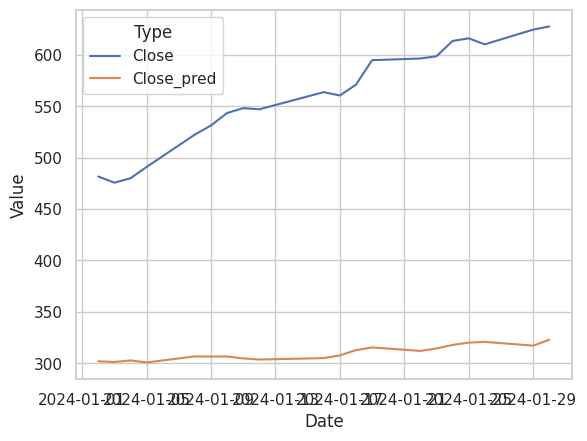

In [125]:
sns.lineplot(data=melted_df, x='Date', y='Value', hue='Type')